#  Simple Linear Regression

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip seaborn==0.13.0

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Modeling / Model Linear / Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score


### Load the data

In [0]:
df = pd.read_csv('./data/FuelConsumptionCo2.csv')

### verify successful load with some randomly selected records


In [0]:
df.sample(9)

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
926,926,2014,ROLLS-ROYCE,PHANTOM DROPHEAD COUPE,COMPACT,6.7,12,A8,Z,20.7,12.7,17.1,17,393
1061,1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
763,763,2014,MERCEDES-BENZ,ML 350 4MATIC FFV,SUV - STANDARD,3.5,6,AS7,E,17.8,13.8,16.0,18,256
103,103,2014,BMW,550i xDRIVE,MID-SIZE,4.4,8,A8,Z,14.4,9.6,12.2,23,281
214,214,2014,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,E,23.7,18.8,21.5,13,344
248,248,2014,CHEVROLET,SONIC,COMPACT,1.4,4,M6,X,8.5,6.2,7.5,38,173
844,844,2014,NISSAN,GT-R,SUBCOMPACT,3.8,6,AM6,Z,14.5,10.9,12.9,22,297
875,875,2014,PORSCHE,911 CARRERA CABRIOLET,MINICOMPACT,3.4,6,AM7,Z,11.6,8.3,10.1,28,232
177,177,2014,CADILLAC,CTS-V SPORT WAGON,STATION WAGON - SMALL,6.2,8,AS6,Z,19.7,12.9,16.6,17,382


### Understand the data

#### `FuelConsumption.csv`:
You will use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182

The objective will be to create a simple linear regression model from one of these characteristics to predict CO2 emissions from unobserved cars based on that characteristic.


### Explore the data
First, consider a statistical summary of the data.

In [0]:
df.describe()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,533.000000,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,308.160672,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,533.000000,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1067 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1067 non-null   float64
 6   CYLINDERS                 1067 non-null   int64  
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  1067 non-null   object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              1067 non-null   int64  
dtypes: float

We can observe from the statistics here that 75% of cars have a combined fuel consumption that is almost three times higher than that of the most efficient car, with respective values ​​of 31 MPG and 11 MPG.

The highest consumption, of 60 MPG, is suspiciously high, but may be legitimate.

The MODELYEAR has a standard deviation of 0 and therefore contains no relevant information.

### Select Features
I will be selecting some resources that may be indicative of CO2 emissions to explore further.

In [0]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
789,1.6,4,7.8,179
690,4.7,8,15.1,347
143,1.4,4,9.2,212
772,6.0,8,14.2,327
658,3.5,6,10.4,239
966,4.0,6,12.9,297
841,4.0,6,12.7,292
893,4.8,8,13.9,320
539,3.5,6,7.6,175
397,3.5,6,11.5,264


### Visualize features
Consider the histograms for each of these features.


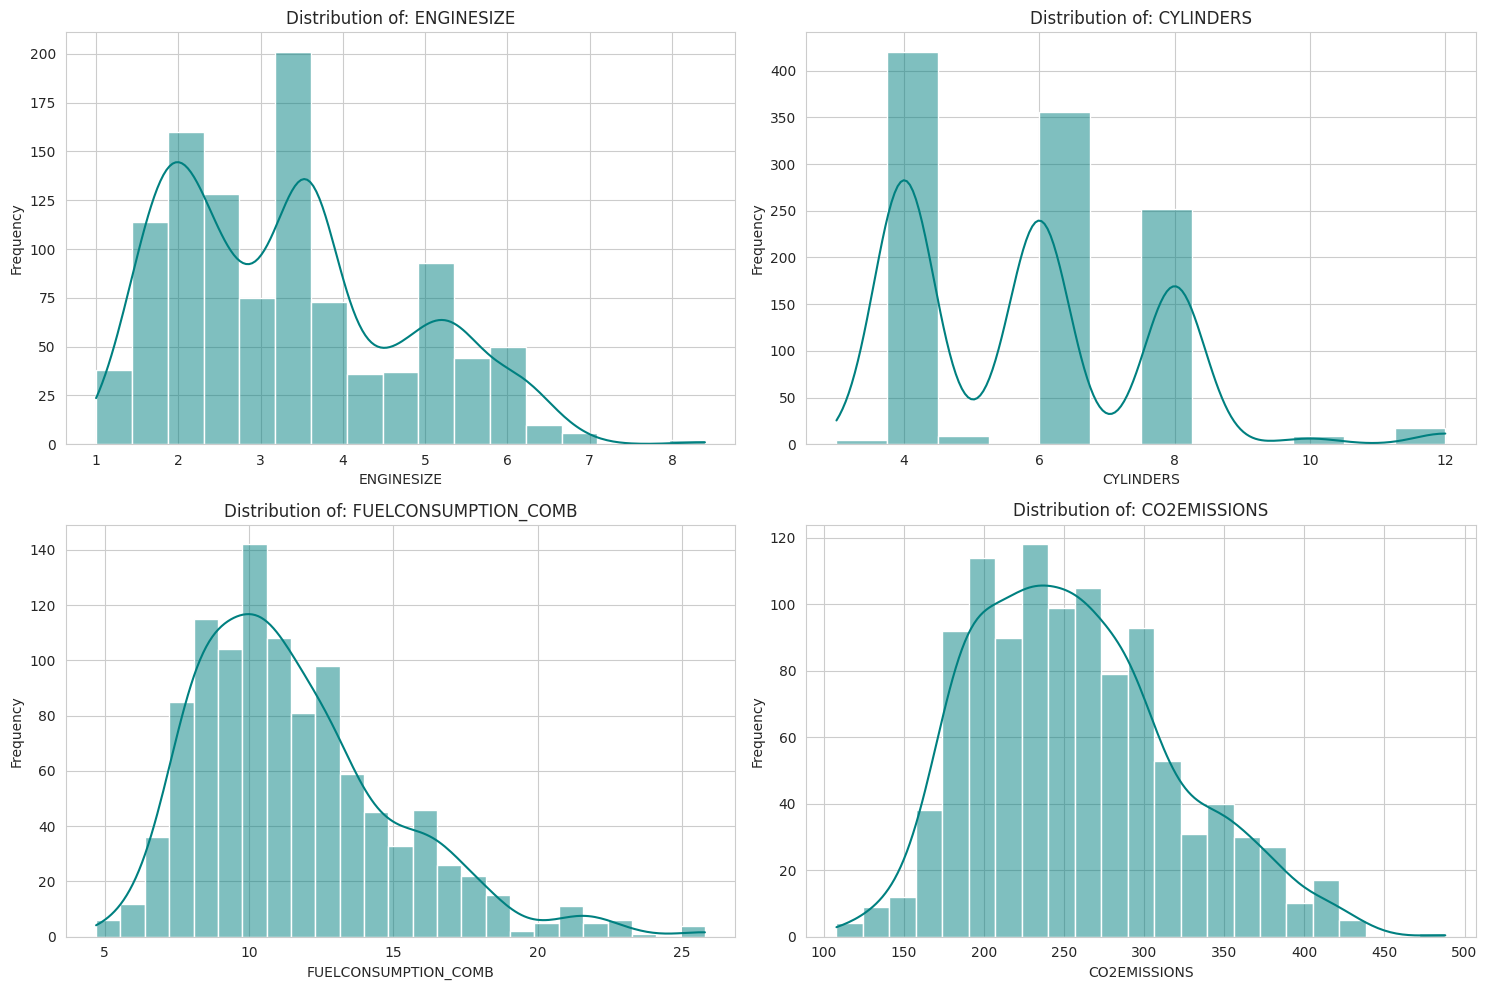

In [0]:
# Data collect
data_ax = cdf.copy()

sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (15, 10))

for i, col in enumerate(data_ax.columns):
    plt.subplot(2, 2, i + 1) # Create a grid 2x2

    # Histogram
    sns.histplot(
        data = data_ax[col],
        kde = True,
        color = 'teal'
    )

    plt.title(f'Distribution of: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most engines have 4, 6, or 8 cylinders and engine sizes between 2 and 4 inches.
As expected, combined fuel consumption and CO2 emissions have very similar distributions.

Display some scatter plots of these characteristics in relation to CO2 emissions to see how their relationships are linear.

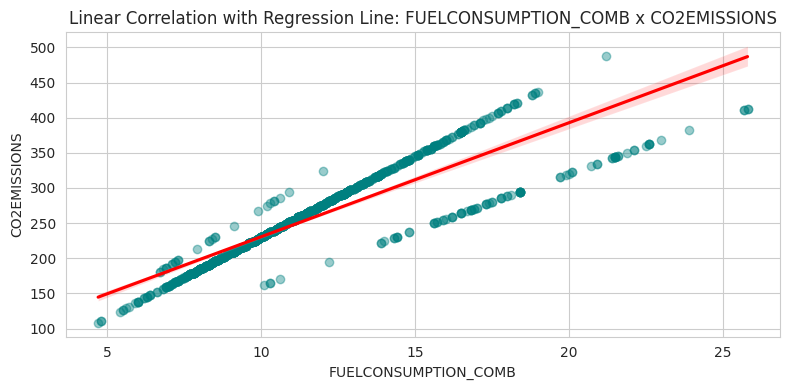

In [0]:
# Data collect
data_ax = cdf.copy()

sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

# scatter_kws={'alpha':0.5}: Makes the points transparent
# line_kws={'color':'red'}: Highlights the trendline in red

sns.regplot(
    x = 'FUELCONSUMPTION_COMB', 
    y = 'CO2EMISSIONS', 
    data = data_ax,
    color = 'teal',
    scatter_kws = {'alpha': 0.4},
    line_kws = {'color': 'red'}
)

plt.title('Linear Correlation with Regression Line: FUELCONSUMPTION_COMB x CO2EMISSIONS')
plt.tight_layout()
plt.show()

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions.
Their intercepts are similar, while they noticeably differ in their slopes.


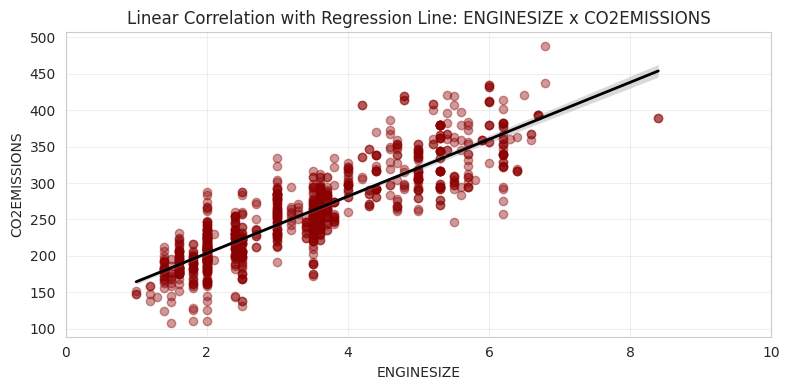

In [0]:
# Data collect
data_ax = cdf.copy()

sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

# scatter_kws={'alpha':0.5}: Makes the points transparent
# line_kws={'color':'red'}: Highlights the trendline in red

sns.regplot(
    x = 'ENGINESIZE', 
    y = 'CO2EMISSIONS', 
    data = data_ax,
    scatter_kws = {'alpha': 0.4, 'color': 'darkred'},
    line_kws = {'color': 'black', 'linewidth':2}
)

plt.title('Linear Correlation with Regression Line: ENGINESIZE x CO2EMISSIONS')
plt.xlim(0, 10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Although the relationship between engine size and CO2 emissions is fairly linear, it can be observed that the correlation between them is weaker than that observed for each of the three fuel consumption groups. 

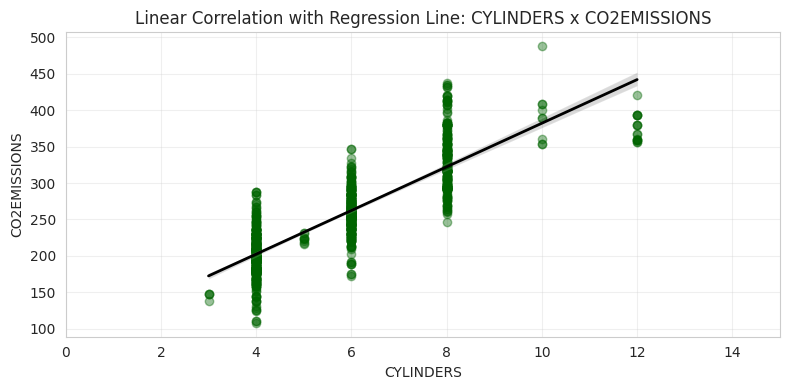

In [0]:
# Data collect
data_ax = cdf.copy()

sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

# scatter_kws={'alpha':0.5}: Makes the points transparent
# line_kws={'color':'red'}: Highlights the trendline in red

sns.regplot(
    x = 'CYLINDERS', 
    y = 'CO2EMISSIONS', 
    data = data_ax,
    scatter_kws = {'alpha': 0.4, 'color': 'darkgreen'},
    line_kws = {'color': 'black', 'linewidth':2}
)

plt.title('Linear Correlation with Regression Line: CYLINDERS x CO2EMISSIONS')
plt.xlim(0, 15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The number of cylinders directly impacts the amount of CO2 emissions. However, 12-cylinder cars consume less fuel than 10-cylinder cars. There is a considerable correlation between these two characteristics, but it is not a perfectly linear relationship.


### Define feature for Linear Regression

I selected the variable FUELCONSUMPTION_COMB as the main feature for the Simple Linear Regression. This choice is due to the fact that it presents the greatest clarity with the target variable compared to many variations observed.

In [0]:
X = cdf['FUELCONSUMPTION_COMB'].to_numpy()
y = cdf['CO2EMISSIONS'].to_numpy()

print(f'The shape of X is: {X.shape}')
print(f'\nThe shape of y is: {y.shape}')

The shape of X is: (1067,)

The shape of y is: (1067,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True,random_state = 33)

type(X_train), np.shape(X_train), np.shape(X_test)

(numpy.ndarray, (853,), (214,))

### Creating the linear regression model

In [0]:
# Create Model
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

print(f'Coefficients: {regressor.coef_[0]}')
print(f'Intercept: {regressor.intercept_}')

Coefficients: 16.13882431852057
Intercept: 69.30751417188623


The model indicates a marginal impact of 16.14: each additional unit of fuel increases emissions by ~16g of CO2. The intercept of 69.31 acts only as a mathematical adjustment (bias) to align the line with the observed data, having no real physical meaning, since zero consumption does not generate emissions.

### Viewing model outputs

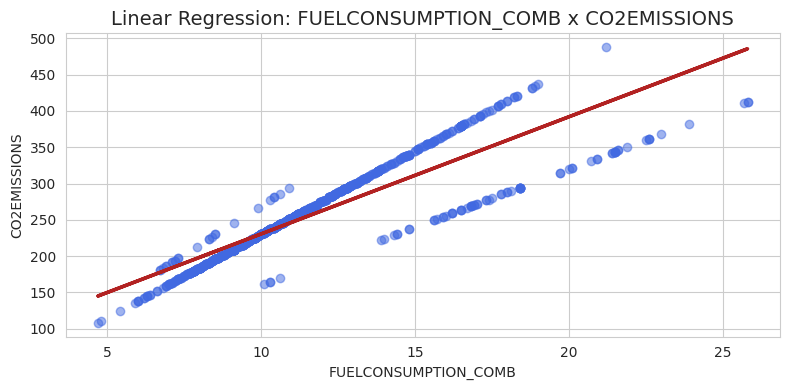

In [0]:
# Data collect
data_ax = cdf.copy()

sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

sns.regplot(
    x = X_train, 
    y = y_train,
    fit_reg = False,
    scatter_kws = {'alpha': 0.5, 'color': 'royalblue'},
)

plt.plot(X_train, 
    regressor.predict(X_train.reshape(-1, 1)),
    color='firebrick', 
    linewidth=2.5
)

plt.title('Linear Regression of Training: FUELCONSUMPTION_COMB x CO2EMISSIONS', fontsize = 14)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

plt.tight_layout()
plt.show()

### Model Evaluation

In [0]:
# Use the predict method to make test predictions
y_test_  = regressor.predict(X_test.reshape(-1, 1))

print(f'Mean Absolute error: {mean_absolute_error(y_test_, y_test):.2f}')
print(f'Mean Squared error: {mean_squared_error(y_test_, y_test):.2f}')
print(f'Root men squared error: {root_mean_squared_error(y_test_, y_test):.2f}')
print(f'R2-score: {r2_score(y_test_, y_test):.2f}')

Mean Absolute error: 19.17
Mean Squared error: 736.54
Root men squared error: 27.14
R2-score: 0.74


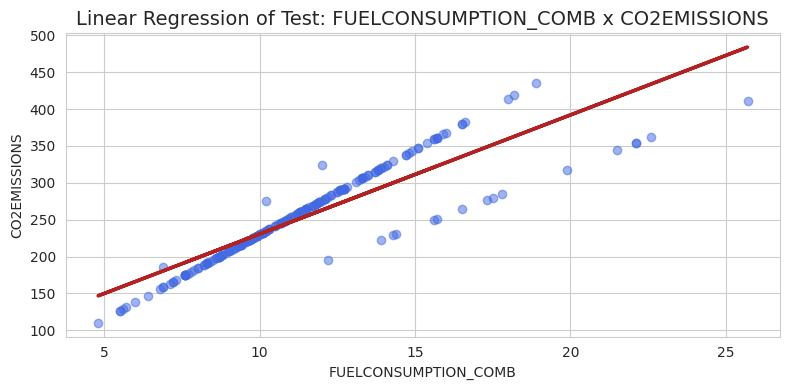

In [0]:
# Data collect
data_ax = cdf.copy()

sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

sns.regplot(
    x = X_test, 
    y = y_test,
    fit_reg = False,
    scatter_kws = {'alpha': 0.5, 'color': 'royalblue'},
)

plt.plot(X_test, 
    y_test_,
    color='firebrick', 
    linewidth=2.5
)

plt.title('Linear Regression of Test: FUELCONSUMPTION_COMB x CO2EMISSIONS', fontsize = 14)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

plt.tight_layout()
plt.show()

### Conclusion

The model is underfitted.

R² (0.74): Acceptable for a first test, but weak for physical data. The model did not capture 26% of the cars' behavior well,
suggesting that the real relationship is a curve, not a straight line.

MAE (19.17) vs RMSE (27.14): There is a large difference between them, which raises a red flag. The high RMSE indicates that the model is making significant errors for some specific cars and penalizing the overall average.

It is possible to conclude that a straight line for this type of data would not be the most appropriate solution. Perhaps exploring new model options with Polynomial Regression or Multilinear Regression would be helpful.